# 楕円の縮閉線

以下の数式で表される楕円について考える  
$x=9\cos(t)$  
$y=4\sin(t)$  
$0\leq t\leq 2\pi$  

In [2]:
a,b=9,4
t = var('t')
x = 9*cos(t)
y = 4*sin(t)
rho = ((a*a*sin(t)*sin(t)+b*b*cos(t)*cos(t))**(3/2))/(a*b)
vx,vy = x.derivative(),y.derivative()
ax,ay = vx.derivative(),vy.derivative()

## 楕円の描画

Matplotlib is building the font cache; this may take a moment.


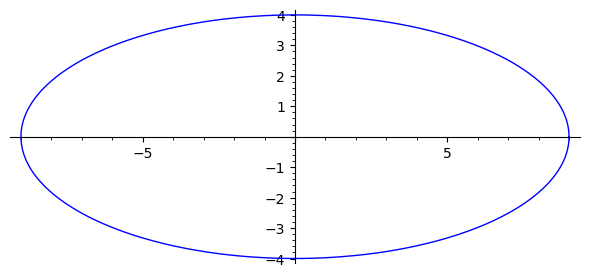

In [2]:
parametric_plot((x,y),(0,2*pi))

## 周回する点

/opt/sagemath-9.2/local/lib/python3.7/site-packages/sage/repl/ipython_kernel/__main__.py:2: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  from sage.repl.ipython_kernel.kernel import SageKernel


Animation with 32 frames
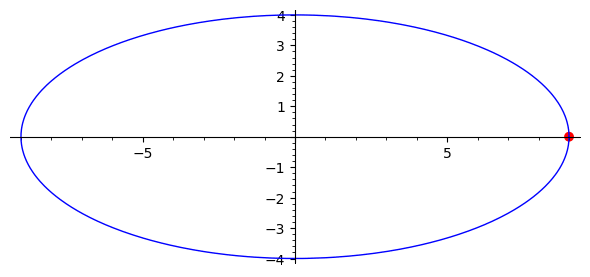

In [115]:
ellipse = parametric_plot((x,y),(0,2*pi))
frames = [ellipse + point2d((x(s),y(s)),size=50,rgbcolor="red") for s in sxrange(0,2*pi,0.2)]
animate(frames)

## 速度ベクトルと加速度ベクトル

Animation with 32 frames
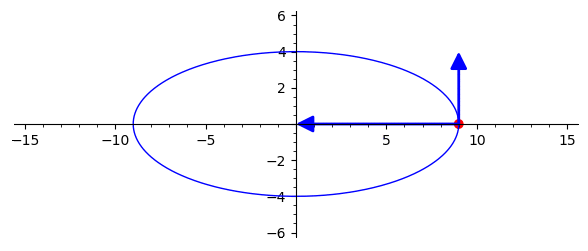

In [82]:
frames = []
for s in sxrange(0,2*pi,0.2):
    p = (ellipse 
         + point2d((x(s),y(s)),size=50,rgbcolor="red") 
         + arrow2d((x(s),y(s)),(x(s)+vx(s),y(s)+vy(s)))
         + arrow2d((x(s),y(s)),(x(s)+ax(s),y(s)+ay(s))))
    p.xmin(-15);p.xmax(15);p.ymin(-6);p.ymax(6)
    frames.append(p)
animate(frames)

## 法線上の点

In [99]:
guzai = (a*a-b*b)/a*(cos(t))**3
eta = (b*b-a*a)/b*(sin(t))**3

Animation with 32 frames
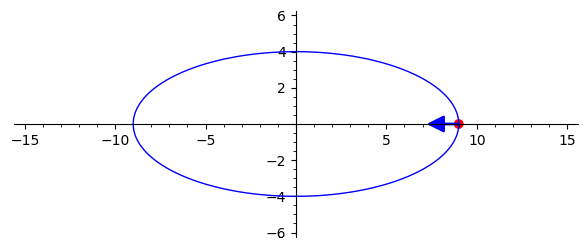

In [91]:
frames = []
for s in sxrange(0,2*pi,0.2):
    p = (ellipse 
         + point2d((x(s),y(s)),size=50,rgbcolor="red") 
         + arrow2d((x(s),y(s)),(guzai(s),eta(s))))
    p.xmin(-15);p.xmax(15);p.ymin(-6);p.ymax(6)
    frames.append(p)
animate(frames)

## 曲率円

In [ ]:
from sage.plot.circle import Circle

Animation with 32 frames
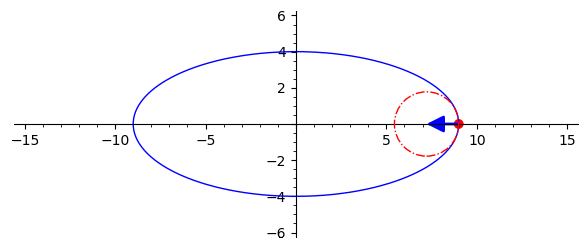

In [92]:
frames = []
for s in sxrange(0,2*pi,0.2):
    p = (ellipse 
         + point2d((x(s),y(s)),size=50,rgbcolor="red") 
         + arrow2d((x(s),y(s)),(guzai(s),eta(s)))
         + circle((guzai(s),eta(s)),rho(s),rgbcolor=(1,0,0),linestyle='-.'))
    p.xmin(-15);p.xmax(15);p.ymin(-6);p.ymax(6)
    frames.append(p)
animate(frames)

## 曲率円の軌跡

Animation with 30 frames
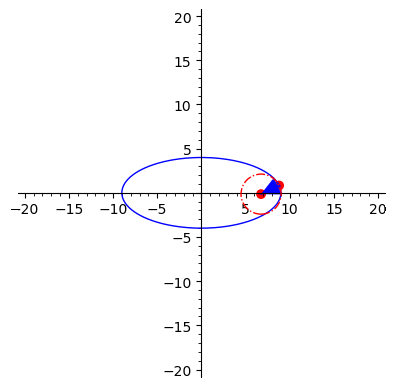

In [114]:
frames = []
N = 30
for i in range(N):
    s = 2*pi*(i+1)/N
    #for s in sxrange(0,2*pi,0.2):error???
    p = (ellipse 
         + point2d((x(s),y(s)),size=50,rgbcolor="red") 
         + arrow2d((x(s),y(s)),(guzai(s),eta(s)))
         + circle((guzai(s),eta(s)),rho(s),rgbcolor=(1,0,0),linestyle='-.')
         + point2d((guzai(s),eta(s)),size=50,rgbcolor="red") 
         + parametric_plot((guzai,eta),(t,0,s)))
    p.xmin(-20);p.xmax(20);p.ymin(-20);p.ymax(20)
    frames.append(p)
animate(frames)

## 参考リンク
- https://doc.sagemath.org/html/en/reference/plotting/sage/plot/graphics.html
- https://doc.sagemath.org/html/en/reference/plotting/sage/plot/animate.html
- https://doc.sagemath.org/html/en/reference/plotting/sage/plot/circle.html
- https://doc.sagemath.org/html/en/reference/plotting/sage/plot/plot.html

## その他

In [104]:
plots = []
u = var('u')
N = 30
for i in range(N):
    t0 = 2*pi*(i+1)/N
    cx = guzai(t0) + rho(t0)*cos(u)
    cy = eta(t0) + rho(t0)*sin(u)
    c = circle((guzai(t0),eta(t0)),rho(t0),rgbcolor=(1,0,0),linestyle='-.')
    #c.set_options({'xmin': -20})
    #c.xmin(-25)
    #c.xmax(25)
    #c.ymin(-30)
    #c.ymax(30)
    pp = parametric_plot((guzai,eta),(0,t0))#,xmin=-25,xmax=25,ymin=-30,ymax=30))
    p = parametric_plot((x,y),(0,2*pi)) + c + pp
    p.xmin(-25)
    p.xmax(25)
    p.ymin(-30)
    p.ymax(30)
    plots.append(p)
    #parametric_plot((cx,cy),(u,0,t0),xmin=-25,xmax=25,ymin=-30,ymax=30))
    #plots.append(parametric_plot((cx,cy),(u,0,2*pi))
    #             +parametric_plot((guzai,eta),(0,2*pi)))
#sum(plots)
a = animate(plots)

In [1]:
import sys
print(sys.version)

3.7.7 (default, Apr 10 2020, 07:59:19) 
[GCC 9.3.0]


# クロソイド Clothoid

In [11]:
# p.20
u=var('u')
points = []
for t in sxrange(-4*pi,4*pi,0.05):
    x,_ = numerical_integral(sin(u*u/2), [0,t])
    y,_ = numerical_integral(cos(u*u/2), [0,t])
    points.append((x,y))

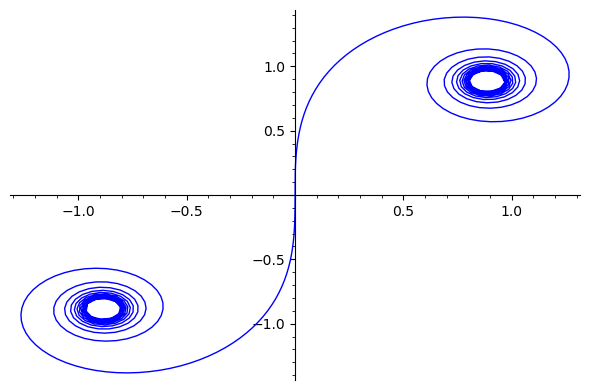

In [12]:
line(points)

# 放物線の縮閉線

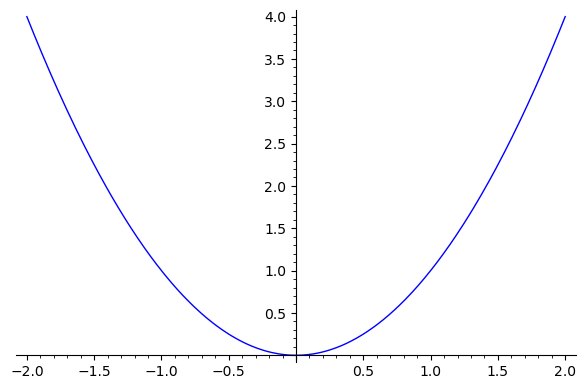

In [15]:
# p.21
x,t=var('x,t')
parabola = plot(x*x,(-2,2))
parabola

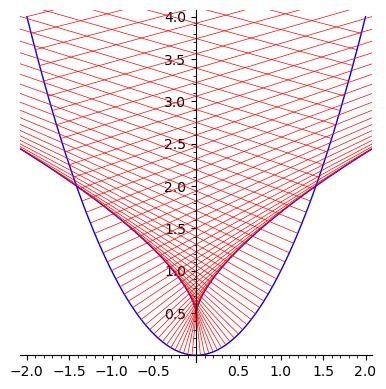

In [51]:
guzai = -4*t*t*t
eta = 1/2 + 3*t*t
p=parabola+parametric_plot( (guzai, eta), (t, -1, 1))
for s in sxrange(-2,2,0.05):
    p += line([(s,s*s),(guzai(s),eta(s))],color="red",thickness=0.5)#,linestyle="--")#,width=1) 
p.xmin(-2);p.xmax(2);p.ymin(0);p.ymax(4)
p

Animation with 81 frames
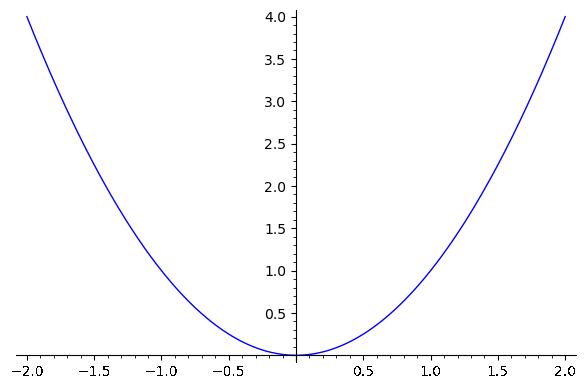

In [55]:
p=parabola
p.xmin(-2);p.xmax(2);p.ymin(0);p.ymax(4)
frame=[p]
for s in sxrange(-2,2,0.05):
    p += line([(s,s*s),(guzai(s),eta(s))],color="red",thickness=0.5)#,linestyle="--")#,width=1) 
    #p.xmin(-2);p.xmax(2);p.ymin(0);p.ymax(4)
    a = p+parametric_plot( (guzai, eta), (t, -1, s))
    a.xmin(-2);a.xmax(2);a.ymin(0);a.ymax(4)
    frame.append(a)
animate(frame)